In [1]:
import h5py
import numpy as np

import time
import os
import string

import sys

import matplotlib.pylab as plt

# Writing strings to a file

In [2]:
sentence=['this','is','a','sentence']
data = []

for i in range(10000):
    data += sentence
print(len(data))
longest_word=len(max(data, key=len))
print('longest_word=',longest_word)

dt = h5py.special_dtype(vlen=str)

arr = np.array(data,dtype='S'+str(longest_word))

with h5py.File('outfile.h5','w') as h5File:
    dset = h5File.create_dataset('words',data=arr,dtype=dt, compression='gzip',compression_opts=9)
    print(dset.shape, dset.dtype)

    h5File.flush()
    h5File.close()

40000
longest_word= 8
(40000,) object


# Another shot at writing and reading strings

In [3]:
h5File=h5py.File('xxx.h5','w')

strList=['asas','asas','asas']

#dt = h5py.special_dtype(vlen=str)
dt = h5py.string_dtype(encoding='utf-8')

dset = h5File.create_dataset('strings',(len(strList),1),dtype=dt)
for i,s in enumerate(strList):
    dset[i] = s

h5File.flush()
h5File.close()



#################

f = h5py.File('xxx.h5', 'r')

print(list(f.keys()))

print(f['strings'])
x = f['strings']

for a in x:
    print(a)

['strings']
<HDF5 dataset "strings": shape (3, 1), type "|O">
[b'asas']
[b'asas']
[b'asas']


# Writing groups under groups

In [4]:
outfilename = 'foo.h5'

if os.path.exists(outfilename):
  os.remove(outfilename)
else:
  print(f"{outfilename} file does not exist")


f = h5py.File(outfilename,'w')
print(f.name)

grp = f.create_group("bar")
subgrp = grp.create_group("baz")

print(subgrp.name)

foo.h5 file does not exist
/
/bar/baz


# Timing tests for large writes

In [5]:
outfilename = 'data_TEST.h5'

if os.path.exists(outfilename):
  os.remove(outfilename)
else:
  print(f"{outfilename} file does not exist")

f = h5py.File(outfilename,'a')

data_TEST.h5 file does not exist


In [6]:
#list(string.ascii_lowercase)

In [7]:
print(''.join(np.random.choice(list(string.ascii_lowercase), size=5)))

rpfwk


In [8]:
ngroups = 10
nchars_in_name = 5

ndatasets_in_group = 20

data = {}

# Make the groups
for n in range(ngroups):
    name = ''.join(np.random.choice(list(string.ascii_lowercase), size=nchars_in_name))
    
    # Keep track of our data
    data[name] = {}
    
    group_names = list(f.keys())
    
    if name not in group_names:
        grp = f.create_group(name)
        
        # Make the datasets in each group
        for nd in range(ndatasets_in_group):
            dname = ''.join(np.random.choice(list(string.ascii_lowercase), size=nchars_in_name))

            data[name][dname] = []
            # Create this at write time
            #dset = grp.create_dataset(dname, dtype='f')
            

In [9]:

print(list(f.keys()))

['mfuxe', 'mkyqi', 'mztfe', 'nhfoq', 'nqlmn', 'qtsjm', 'sbfht', 'silhm', 'xhmgw', 'yyerz']


In [10]:
def printname(name):
    print(name)
#f.visit(printname)

In [11]:

# Fill the data
nevents = 400000
nentries_per_group = (1, 10)

for group in data.keys():
    nentries = nevents*np.random.randint(nentries_per_group[0],nentries_per_group[1])
    print(f"{group}: {nentries}")
    for dset in data[group].keys():
        data[group][dset] = np.random.random(nentries)

xhmgw: 2000000
mkyqi: 400000
nqlmn: 800000
mfuxe: 3200000
mztfe: 1200000
yyerz: 400000
nhfoq: 2400000
sbfht: 800000
silhm: 3200000
qtsjm: 2800000


In [12]:
#data
time.time()

1687199886.708814

In [13]:
# Fill the data

start = time.time()
print(f"Starting to fill file with {nevents} events at {start}")

for group in data.keys():
    grp = f[group]
    print(f"Writing {group} and {len(data[group].keys())} datasets")
    for dname in data[group].keys():
        #print(list(f[group].keys()))
        if dname in f[group].keys():
            fullname = f"{group}/{dname}"
            del f[fullname]
        else:
            fullname = f"{group}/{dname}"
            #print(f"\t{fullname}")
            dset = grp.create_dataset(dname, data=data[group][dname],compression="gzip", compression_opts=9)


stop = time.time()
print(f"Finished filling file with {nevents} events at {stop}")
print(f"Time to fill: {stop-start:0.2f} seconds")

Starting to fill file with 400000 events at 1687199895.512604
Writing xhmgw and 20 datasets
Writing mkyqi and 20 datasets
Writing nqlmn and 20 datasets
Writing mfuxe and 20 datasets
Writing mztfe and 20 datasets
Writing yyerz and 20 datasets
Writing nhfoq and 20 datasets
Writing sbfht and 20 datasets
Writing silhm and 20 datasets
Writing qtsjm and 20 datasets
Finished filling file with 400000 events at 1687199951.1364374
Time to fill: 55.62 seconds


In [14]:

f.close()

# Try opening the file

In [15]:
f = h5py.File(outfilename,'r')

In [16]:

def printname(name):
    print(name)
f.visit(printname)

mfuxe
mfuxe/anvtk
mfuxe/awurg
mfuxe/bpswr
mfuxe/ccjnc
mfuxe/ckmbd
mfuxe/ebjrs
mfuxe/gpsum
mfuxe/ixgba
mfuxe/jyode
mfuxe/lfcpn
mfuxe/owkxi
mfuxe/ozgby
mfuxe/qxjah
mfuxe/rgpuv
mfuxe/tvhnq
mfuxe/uliek
mfuxe/unnhf
mfuxe/xcohi
mfuxe/ysdao
mfuxe/zhfrw
mkyqi
mkyqi/bbcne
mkyqi/cftcw
mkyqi/dcwgq
mkyqi/dinqk
mkyqi/fdzvu
mkyqi/kedzr
mkyqi/khnpw
mkyqi/krxgv
mkyqi/lfsoq
mkyqi/ohtgm
mkyqi/pyjwv
mkyqi/sfsgm
mkyqi/twbpw
mkyqi/uzwpp
mkyqi/vzmmb
mkyqi/wkwim
mkyqi/yxsbb
mkyqi/zbswy
mkyqi/zjwzq
mkyqi/zkopt
mztfe
mztfe/cwbwt
mztfe/egfxp
mztfe/fejlt
mztfe/fpxvo
mztfe/goxgw
mztfe/jrdfz
mztfe/jrhoc
mztfe/khryq
mztfe/lyhif
mztfe/myuvw
mztfe/njxtu
mztfe/oqkqa
mztfe/quehr
mztfe/rtzzp
mztfe/thixs
mztfe/ttlmc
mztfe/unsfu
mztfe/vcltv
mztfe/zjzit
mztfe/zoneg
nhfoq
nhfoq/bcthh
nhfoq/bhuec
nhfoq/cbmvj
nhfoq/ecjnt
nhfoq/ekjqm
nhfoq/emfke
nhfoq/erbvy
nhfoq/foqss
nhfoq/mnwtu
nhfoq/nbrwj
nhfoq/ncarw
nhfoq/ngwts
nhfoq/onwak
nhfoq/ppomq
nhfoq/qchkv
nhfoq/qiinr
nhfoq/uuqqn
nhfoq/vzgso
nhfoq/xjlgn
nhfoq/ywqiw
nqlmn
nqlmn/brhe

In [17]:
k0 = list(f.keys())[0]
k1 = list(f[k0].keys())[0]

x = f[f'{k0}/{k1}'][()] # This last bit returns a numpy array

print(type(x))
print(x)

#x.values

print(len(x))

<class 'numpy.ndarray'>
[0.14067974 0.66736235 0.77736154 ... 0.13661319 0.34258128 0.72149612]
3200000


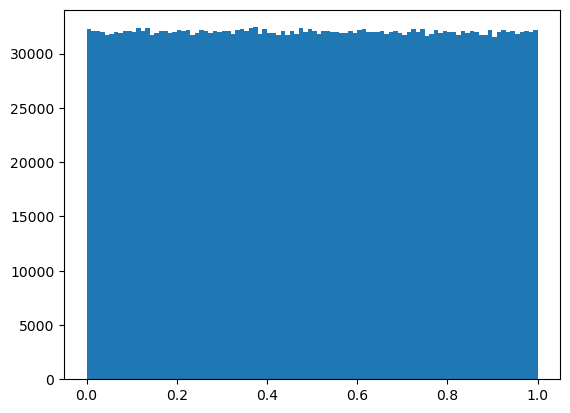

In [18]:
plt.hist(x,bins=100);

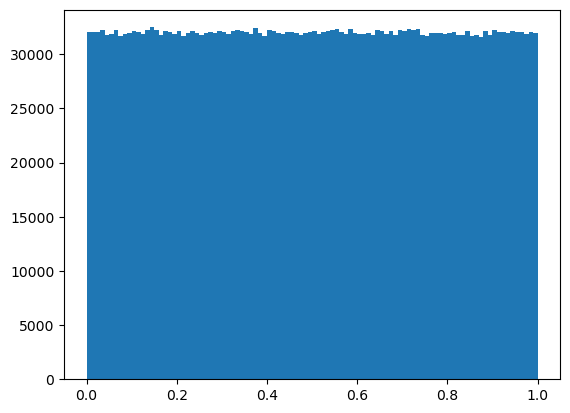

In [19]:
plt.hist(np.random.random(len(x)),bins=100);

In [20]:
grp = f[k0]
print(grp)

<HDF5 group "/mfuxe" (20 members)>


In [21]:
x = grp[k1][()]

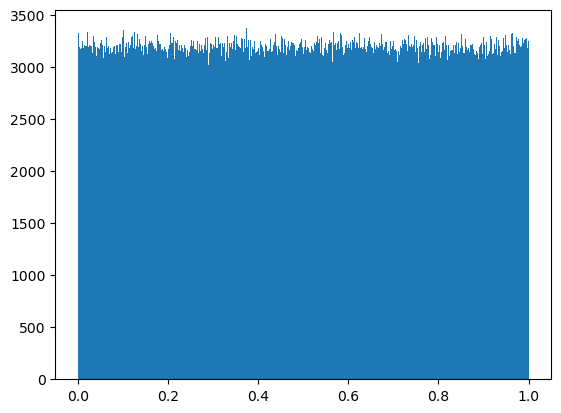

In [22]:
len(x)
plt.hist(x,bins=1000);

In [23]:
for group in f.keys():
    grp = f[group]
    print(group)
    for i,dname in enumerate(f[group].keys()):
        fullname = f"{group}/{dname}"
        #print(f[fullname])
        #if i == 0:
        #    plt.figure()
        #    plt.hist(f[fullname],bins=100)

mfuxe
mkyqi
mztfe
nhfoq
nqlmn
qtsjm
sbfht
silhm
xhmgw
yyerz


In [24]:

f.close()